Q&A Bot with Python

In [1]:
import pickle 
import numpy as np

In [2]:
with open("train_qa.txt","rb") as f:
    train_data = pickle.load(f)

In [6]:
# load test data
with open("test_qa.txt","rb") as f:
    test_data = pickle.load(f)

In [3]:
type(train_data)

list

In [4]:
len(train_data)

10000

In [7]:
type(test_data)

list

In [8]:
len(test_data)

1000

In [9]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [10]:
# Story
" ".join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [12]:
# Question
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [13]:
# Answer
train_data[0][2]

'no'

In [14]:
# Setup a vocabulary
all_data = test_data + train_data
len(all_data)

11000

In [15]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [16]:
vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [17]:
# Add in two possible answers... i.e Yes and No
vocab.add('no')
vocab.add('yes')

In [18]:
len(vocab)

37

In [19]:
#  there's essentially 37 unique words plus that 1 placeholder that we're gonna use later on, durind keras padding.
vocab_len = len(vocab) + 1
vocab_len

38

In [20]:
# Longest story
all_story_lengths = [len(data[0]) for data in all_data]
max_story_len = max(all_story_lengths)
max_story_len

156

In [22]:
# Longest question
all_qs_length = [len(data[1]) for data in all_data]
max_qs_len = max(all_qs_length)
max_qs_len

6

In [29]:
import tensorflow
import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [30]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [31]:
tokenizer.word_index

{'apple': 1,
 '?': 2,
 'daniel': 3,
 'to': 4,
 'down': 5,
 'got': 6,
 'bedroom': 7,
 'travelled': 8,
 'grabbed': 9,
 'hallway': 10,
 'football': 11,
 'went': 12,
 'took': 13,
 'dropped': 14,
 'the': 15,
 'up': 16,
 'garden': 17,
 'sandra': 18,
 'john': 19,
 'office': 20,
 'milk': 21,
 'moved': 22,
 'yes': 23,
 'no': 24,
 'journeyed': 25,
 'is': 26,
 'discarded': 27,
 'there': 28,
 'bathroom': 29,
 'mary': 30,
 'picked': 31,
 'left': 32,
 '.': 33,
 'put': 34,
 'kitchen': 35,
 'back': 36,
 'in': 37}

In [33]:
# Tokenization for story questions and answers
train_story_text = []
train_question_text = []
train_answer_text = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answer_text.append(answer)

In [35]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
len(train_story_seq)

10000

In [36]:
len(train_story_text)

10000

In [38]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [39]:
train_story_seq

[[30, 22, 4, 15, 29, 33, 18, 25, 4, 15, 7, 33],
 [30,
  22,
  4,
  15,
  29,
  33,
  18,
  25,
  4,
  15,
  7,
  33,
  30,
  12,
  36,
  4,
  15,
  7,
  33,
  3,
  12,
  36,
  4,
  15,
  10,
  33],
 [30,
  22,
  4,
  15,
  29,
  33,
  18,
  25,
  4,
  15,
  7,
  33,
  30,
  12,
  36,
  4,
  15,
  7,
  33,
  3,
  12,
  36,
  4,
  15,
  10,
  33,
  18,
  12,
  4,
  15,
  35,
  33,
  3,
  12,
  36,
  4,
  15,
  29,
  33],
 [30,
  22,
  4,
  15,
  29,
  33,
  18,
  25,
  4,
  15,
  7,
  33,
  30,
  12,
  36,
  4,
  15,
  7,
  33,
  3,
  12,
  36,
  4,
  15,
  10,
  33,
  18,
  12,
  4,
  15,
  35,
  33,
  3,
  12,
  36,
  4,
  15,
  29,
  33,
  3,
  31,
  16,
  15,
  11,
  28,
  33,
  3,
  12,
  4,
  15,
  7,
  33],
 [30,
  22,
  4,
  15,
  29,
  33,
  18,
  25,
  4,
  15,
  7,
  33,
  30,
  12,
  36,
  4,
  15,
  7,
  33,
  3,
  12,
  36,
  4,
  15,
  10,
  33,
  18,
  12,
  4,
  15,
  35,
  33,
  3,
  12,
  36,
  4,
  15,
  29,
  33,
  3,
  31,
  16,
  15,
  11,
  28,
  33,
  3,
  12,
  

In [40]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_qs_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [41]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [42]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [43]:
inputs_test

array([[ 0,  0,  0, ..., 15,  7, 33],
       [ 0,  0,  0, ..., 15, 17, 33],
       [ 0,  0,  0, ..., 15, 17, 33],
       ...,
       [ 0,  0,  0, ..., 15,  1, 33],
       [ 0,  0,  0, ..., 15, 17, 33],
       [ 0,  0,  0, ...,  1, 28, 33]])

In [44]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
tokenizer.word_index['yes']

23

In [46]:
tokenizer.word_index['no']

24

In [47]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 497., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [48]:
# Create the model

In [53]:
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

### Placeholders for Inputs

Recall we technically have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.


In [54]:
# PLACEHOLDER shape=(max_story_len, batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_qs_len,))

In [55]:
# vocab_len
vocab_size = len(vocab) + 1 

In [58]:
# INPUT ENCODER M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,
                              output_dim=64))

# a dropout layer, all it does, is it turns off a percentage randomly of neurons as you're training. that helps with over fitting.
input_encoder_m.add(Dropout(0.3))

# Output (sample,story_maxLen,embedding_dim)


In [57]:
# INPUT ENCODER C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,
                              output_dim=max_qs_len))

# a dropout layer, all it does, is it turns off a percentage randomly of neurons as you're training. that helps with over fitting.
input_encoder_c.add(Dropout(0.3))

# Output (sample,story_maxLen,max_qs_len)


In [56]:
# Question Encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                              output_dim=64,
                              input_length=max_qs_len))

# a dropout layer, all it does, is it turns off a percentage randomly of neurons as you're training. that helps with over fitting.
question_encoder.add(Dropout(0.3))

# Output (samples, query_maxLen, embedding_dim)


In [59]:
# ENCODED <--- ENCODER(INPUT) 
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [60]:
match = dot([input_encoded_m,question_encoded], axes=(2,2))
match = Activation("softmax")(match)

In [61]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [62]:
answer = concatenate([response,question_encoded])
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [63]:
# Reduce with RNN (LSTM)
answer = LSTM(32)(answer)  # (samples, 32)

In [64]:
# Regularization with Dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size)

In [65]:
# we output a probability distribution over the vocabulary
answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_2 (Sequential)      (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential (Sequential)        (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [67]:
# train
history = model.fit([inputs_train, queries_train], 
                    answers_train,batch_size=32,
                    epochs=120,
                    validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 10s 20ms/step - loss: 0.8981 - accuracy: 0.5004 - val_loss: 0.6949 - val_accuracy: 0.5040
Epoch 2/120
313/313 [==============================] - 5s 16ms/step - loss: 0.7046 - accuracy: 0.5089 - val_loss: 0.6944 - val_accuracy: 0.5030
Epoch 3/120
313/313 [==============================] - 5s 17ms/step - loss: 0.6983 - accuracy: 0.5034 - val_loss: 0.6957 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 5s 15ms/step - loss: 0.6967 - accuracy: 0.4963 - val_loss: 0.6951 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 5s 17ms/step - loss: 0.6956 - accuracy: 0.5023 - val_loss: 0.6939 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 5s 16ms/step - loss: 0.6951 - accuracy: 0.5047 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 7/120
313/313 [==============================] - 4s 14ms/step - loss: 0.6952 - accuracy: 0.4983 - val_loss: 0.6935 - val_accuracy

### Saving the Model

In [68]:
filename = 'chatbot_120_epochs.h5'
model.save(filename)

## Evaluating the Model

### Plotting Out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


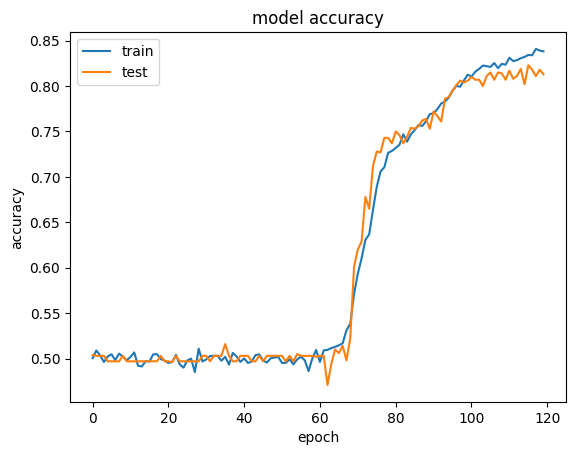

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluating on Given Test Set

In [72]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 3ms/step


In [73]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [74]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [75]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [76]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [77]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9996221


## Writing Your Own Stories and Questions

Remember you can only use words from the existing vocab

In [78]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [79]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [80]:
my_question = "Is the football in the garden ?"

In [81]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [82]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [83]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [84]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 25ms/step


In [85]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.754214
